In [ ]:
                                    Loan Application Status Prediction
Project overview:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, 
loan amount, their income, dependents etc.
To predicts whether a loan application will be approved based on various applicants details. The model is trained on a 
dataset containing information such as income, credit history, and marital status.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Summary Statistics:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

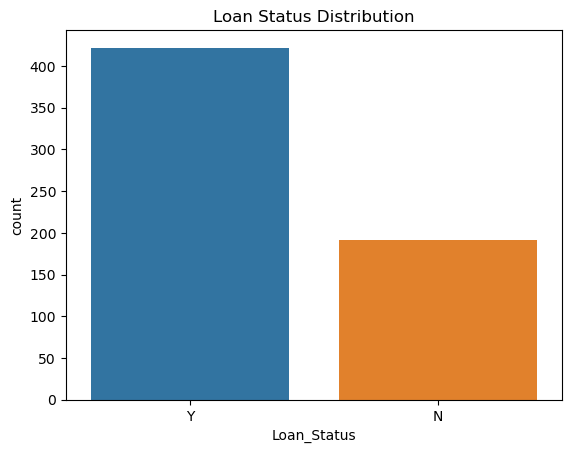

Accuracy Score: 0.7479674796747967

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.42      0.54        43
           1       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123


Confusion Matrix:
 [[18 25]
 [ 6 74]]


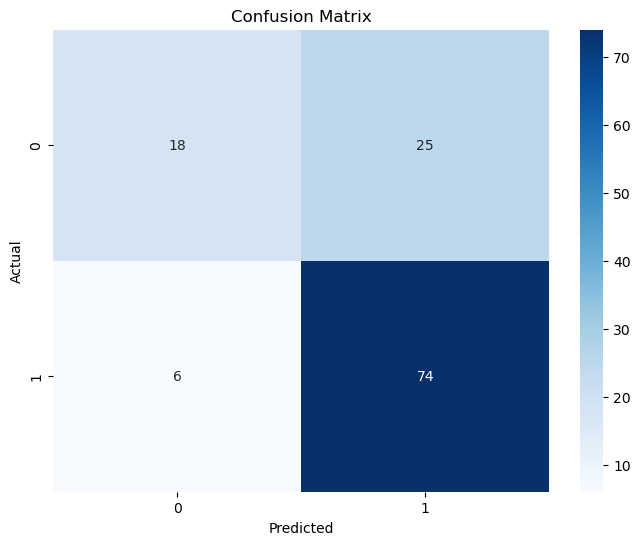

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Load the dataset
url = "https://github.com/dsrscientist/DSData/raw/master/loan_prediction.csv"
data = pd.read_csv(url)

# Step 2: EDA - Basic insights
print("Dataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

# Step 3: Data Visualization (Optional)
# Visualizing Loan Status
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status Distribution')
plt.show()

# Step 4: Data Preprocessing
# Filling missing values
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Education'].fillna(data['Education'].mode()[0], inplace=True)
data['ApplicantIncome'].fillna(data['ApplicantIncome'].median(), inplace=True)
data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

# Dropping Loan_ID as it does not provide predictive power
data.drop('Loan_ID', axis=1, inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting features and target variable
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Step 5: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Model Building - Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
Step 1: Load the Dataset
The dataset is loaded into a pandas DataFrame from the provided URL.

Step 2: Exploratory Data Analysis (EDA)
Basic information about the dataset, including data types, summary statistics, and missing values, is printed for analysis.

Step 3: Data Visualization (Optional)
A count plot of the loan status distribution is generated for visualization.

Step 4: Data Preprocessing
Missing Value Handling: Missing values in various columns are filled using median or mode.
Drop Non-Predictive Columns: The Loan_ID column is dropped as it does not contribute to the prediction.
Label Encoding: Categorical variables are converted to numeric using LabelEncoder.
Step 5: Split the Dataset
The dataset is split into training and testing sets (80% train, 20% test) for model evaluation.

Step 6: Model Building
A Random Forest Classifier is instantiated and trained on the training data.

Step 7: Model Evaluation
The trained model is evaluated using accuracy score, classification report, and confusion matrix. 
The confusion matrix is also visualized.

Usage
Clone or download the script.
Ensure all required packages are installed.
Run the script in your Python environment.
Observe the printed evaluation metrics and the confusion matrix plot to assess the models performance.
Conclusion
This script provides a simple yet effective way to predict loan application status based on various features. 
The Random Forest Classifier is used for its robustness and efficiency in handling classification tasks.